<a href="https://colab.research.google.com/github/cyberneel/ImageSecretEmbed/blob/main/ImageEmbedSecret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [ ]:
!pip install pillow numpy

# Main Code

In [ ]:
from PIL import Image
import numpy as np
import io
from google.colab import files

def ToBinary(text):
    binary = ''.join(format(ord(char), '08b') for char in text)
    return binary

def ToText(binary):
    characters = [binary[i:i+8] for i in range(0, len(binary), 8)]
    textForm = ''.join([chr(int(char, 2)) for char in characters])
    return textForm

# Used to test proper conversion
print(ToBinary("Hello There"))
print(ToText(ToBinary("Hello There")))

0100100001100101011011000110110001101111001000000101010001101000011001010111001001100101
Hello There


In [ ]:
def EncodeIntoImage(imagePath, text):
    image = Image.open(imagePath)
    textBinary = ToBinary(text) + '1111111111111110'  # This will help find the end
    binTextLen = len(textBinary)

    # Turn image into data with numpy
    imageData = np.array(image)
    height, width, colorChannels = imageData.shape # simialr to pytorch

    if (height * width * 3) > binTextLen:
      print("Image too small to store text!!!")
      return

    # make all pixels even
    for y in range(height):
      for x in range(width):
        for c in range(3): # represents rgb
          if (imageData[y, x, c] % 2 != 0):
            imageData[y, x, c] -= 1

    # Now loop through the binary
    dataIndex = 0
    for y in range(height):
      for x in range(width):
        for c in range(3): # represents rgb
          if (dataIndex < binTextLen):
            imageData[y, x, c] += int(textBinary[dataIndex])
            dataIndex += 1

    TextEncodedImage = Image.fromarray(imageData)
    return TextEncodedImage


In [ ]:
def DecodeFromImage(imagePath):
  image = Image.open(imagePath)

  # Turn image. into data
  imageData = np.array(image)
  height, width, colorChannels = imageData.shape
  BinaryFromImage = ""

  # pixels loop
  for y in range(height):
    for x in range(width):
      for c in range(3):
        BinaryFromImage += str(imageData[y, x, c] % 2)

  return ToText(BinaryFromImage[:BinaryFromImage.find("1111111111111110")]) # Use delimeter to find and slice

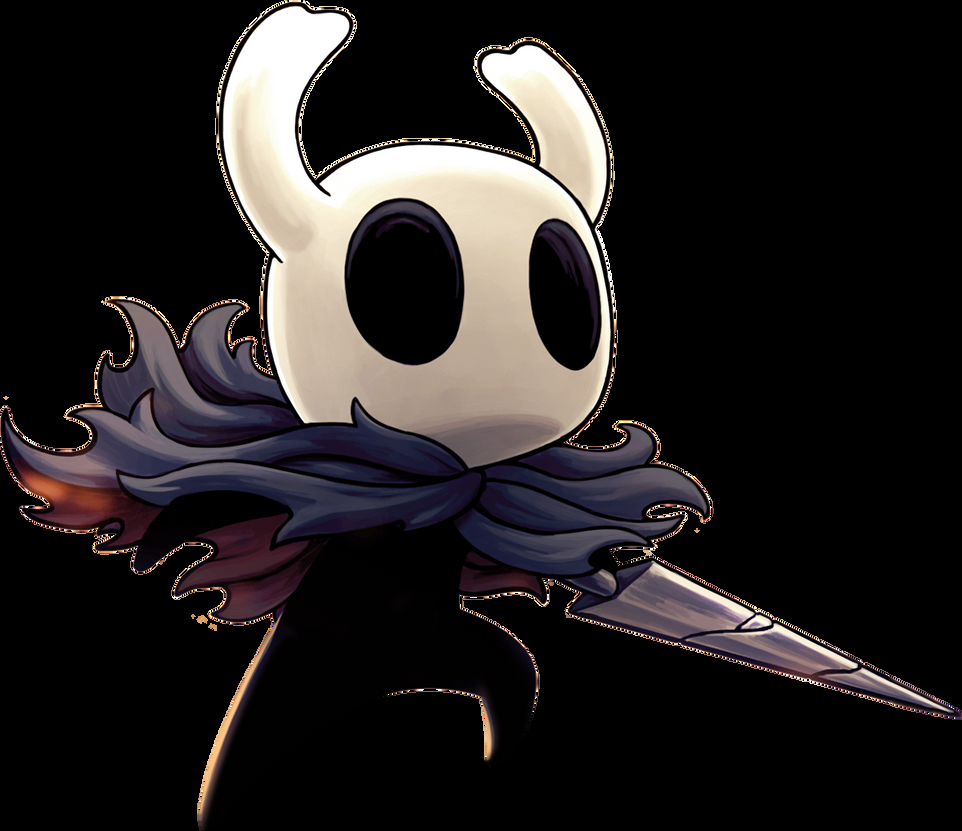

NameError: name 'EncodeIntoImage' is not defined

In [6]:
# past image path from sidebar and text, then encode
imagePath = "/content/IMG_0246.png" #@param {type:"string"}

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(imagePath)
cv2_imshow(img)

text = "SECRET" #@param {type:"string"}
encoded_img = EncodeIntoImage(imagePath, text)
encoded_img.save('secret.png')

In [ ]:
# Decode the image

DecodeFromImage("/content/secret.png")